In [36]:
import pandas as pd
s_train = pd.read_csv("./BTC_USD.csv", index_col="Date", parse_dates=True, squeeze=True)

/var/folders/vq/lr9jr0w132n5fxzlgyfxgg3h0000gn/T/ipykernel_6239/1907568209.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s_train = pd.read_csv("./BTC_USD.csv", index_col="Date", parse_dates=True, squeeze=True)


In [37]:
from adtk.data import validate_series
s_train = validate_series(s_train)
print(s_train)

Date
2022-06-22    19943.0
2022-06-23    21071.0
2022-06-24    21229.0
2022-06-25    21485.0
2022-06-26    21067.0
               ...   
2022-09-16    19809.9
2022-09-17    20127.0
2022-09-18    19424.0
2022-09-19    19544.5
2022-09-20    19261.0
Freq: D, Name: Price, Length: 91, dtype: float64


[<AxesSubplot:>]

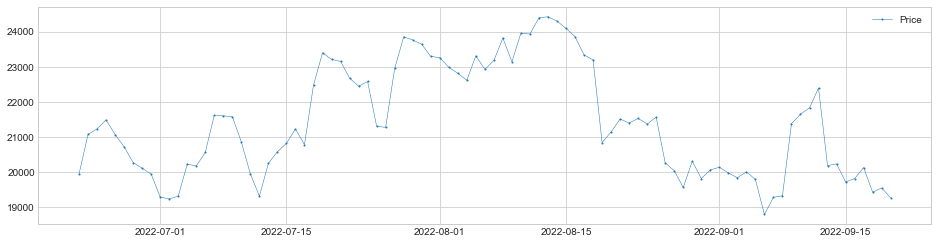

In [38]:
from adtk.visualization import plot
plot(s_train)

[<AxesSubplot:>]

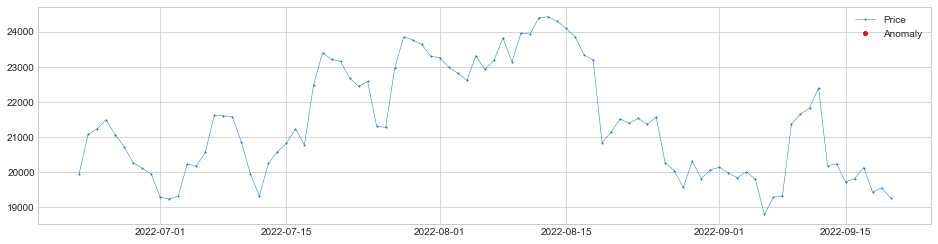

In [39]:
from adtk.detector import SeasonalAD
seasonal_ad = SeasonalAD()
anomalies = seasonal_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")